In [1]:
import os.path
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.modelbuilder.supervised  import SupervisedDataLoader 
from datatools.customtransformers import LogTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline 
np.set_printoptions(precision=4)

pd.set_option('display.width', 200)
pd.set_option('precision', 4)
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")

In [2]:
load_app_config()
DIRECTORY="kaggle_housing"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'SalePrice'
LOGRESPONSE = 'LogSalePrice'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

Adding D:\DataSource  to system path
Adding D:\MachineLearning  to system path
D:\DataSource\kaggle_housing\train.csv
D:\DataSource\kaggle_housing\test.csv


In [3]:
#df_loader = DataFrameLoader(train_file, sep=',',header=0 ,encoding='utf8')
sm = SupervisedDataLoader(train_file=train_file,test_file=test_file,response =RESPONSE)
train_dataset ,test_dataset  = sm.train_dataset,sm.test_dataset
train_test = pd.concat([train_dataset,test_dataset],axis =0)

Loading train_file :D:\DataSource\kaggle_housing\train.csv
Loading test_file :D:\DataSource\kaggle_housing\test.csv


In [4]:
feature_count  = train_test.nunique(dropna=False)
constant_features = pd.DataFrame({'feature':feature_count.index,'count':feature_count.values})
print("constant features :{0},{1}".format(*constant_features.shape))
constant_features[constant_features['count']==1].head()

constant features :81,2


,feature,count


In [5]:
sm.describe_target()

count      1460.0000
mean     180921.1959
std       79442.5029
min       34900.0000
25%      129975.0000
50%      163000.0000
75%      214000.0000
max      755000.0000
Name: SalePrice, dtype: float64

In [6]:
neigbourhood_saleprice_desc =train_dataset.groupby('Neighborhood')['SalePrice'].describe().reset_index()
neigbourhood_saleprice_desc = neigbourhood_saleprice_desc.sort_values(by=['count'])
neigbourhood_saleprice_desc

,Neighborhood,count,mean,std,min,25%,50%,75%,max
1,Blueste,2.0,137500.0000,19091.8831,124000.0,130750.00,137500.0,144250.00,151000.0
13,NPkVill,9.0,142694.4444,9377.3145,127500.0,140000.00,146000.0,148500.00,155000.0
24,Veenker,11.0,238772.7273,72369.3180,162500.0,184250.00,218000.0,282000.00,385000.0
2,BrDale,16.0,104493.7500,14330.1765,83000.0,91000.00,106000.0,118000.00,125000.0
10,MeadowV,17.0,98576.4706,23491.0496,75000.0,83500.00,88000.0,115000.00,151400.0
0,Blmngtn,17.0,194870.8824,30393.2292,159895.0,174000.00,191000.0,213490.00,264561.0
22,StoneBr,25.0,310499.0000,112969.6766,170000.0,213500.00,278000.0,377426.00,556581.0
18,SWISU,25.0,142591.3600,32622.9177,60000.0,128000.00,139500.0,160000.00,200000.0
4,ClearCr,28.0,212565.4286,50231.5390,130000.0,183750.00,200250.0,242225.00,328000.0
9,IDOTRR,37.0,100123.7838,33376.7101,34900.0,81000.00,103000.0,120500.00,169500.0


In [7]:
neigbourhood_cut =neigbourhood_saleprice_desc['count']
cut_bins  = pd.qcut(neigbourhood_cut,5)
neigbourhood_saleprice_desc['Good']= cut_bins
neigbourhood_saleprice_desc

,Neighborhood,count,mean,std,min,25%,50%,75%,max,Good
1,Blueste,2.0,137500.0000,19091.8831,124000.0,130750.00,137500.0,144250.00,151000.0,"(1.999, 17.0]"
13,NPkVill,9.0,142694.4444,9377.3145,127500.0,140000.00,146000.0,148500.00,155000.0,"(1.999, 17.0]"
24,Veenker,11.0,238772.7273,72369.3180,162500.0,184250.00,218000.0,282000.00,385000.0,"(1.999, 17.0]"
2,BrDale,16.0,104493.7500,14330.1765,83000.0,91000.00,106000.0,118000.00,125000.0,"(1.999, 17.0]"
10,MeadowV,17.0,98576.4706,23491.0496,75000.0,83500.00,88000.0,115000.00,151400.0,"(1.999, 17.0]"
0,Blmngtn,17.0,194870.8824,30393.2292,159895.0,174000.00,191000.0,213490.00,264561.0,"(1.999, 17.0]"
22,StoneBr,25.0,310499.0000,112969.6766,170000.0,213500.00,278000.0,377426.00,556581.0,"(17.0, 37.6]"
18,SWISU,25.0,142591.3600,32622.9177,60000.0,128000.00,139500.0,160000.00,200000.0,"(17.0, 37.6]"
4,ClearCr,28.0,212565.4286,50231.5390,130000.0,183750.00,200250.0,242225.00,328000.0,"(17.0, 37.6]"
9,IDOTRR,37.0,100123.7838,33376.7101,34900.0,81000.00,103000.0,120500.00,169500.0,"(17.0, 37.6]"


In [8]:
missing_df =test_dataset.isnull().sum().to_frame().reset_index()
missing_df = missing_df.rename(columns= {0: 'Count','index':'Feature'})
test_missing_df= missing_df[missing_df['Count']!=0]
test_missing_df['missing_percent'] =missing_df['Count']/test_dataset.shape[0]
test_missing_df.sort_values(['missing_percent'],ascending =False)

,Feature,Count,missing_percent
72,PoolQC,1456,0.9979
74,MiscFeature,1408,0.9650
6,Alley,1352,0.9267
73,Fence,1169,0.8012
57,FireplaceQu,730,0.5003
3,LotFrontage,227,0.1556
64,GarageCond,78,0.0535
59,GarageYrBlt,78,0.0535
63,GarageQual,78,0.0535
60,GarageFinish,78,0.0535


skewness of response: 1.8828757597682129
kurtosis of response: 6.536281860064529


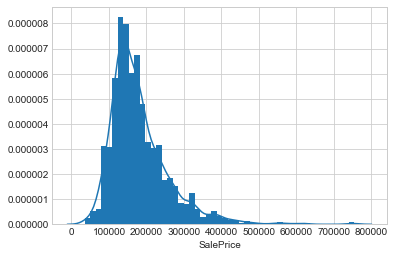

In [9]:
tgt_plot = sm.get_target_plot(continuous=True)
tgt_plot.show()

skewness of response: 0.12134661989685333
kurtosis of response: 0.809519155707878


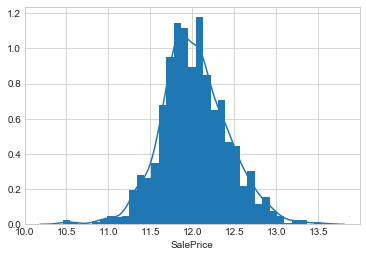

In [10]:
tgt_plot = sm.get_target_plot(continuous=True,convert_log = True)
tgt_plot.show()

In [11]:
continuous_features ,categorical_features  = sm.get_feature_groups(train_dataset)

In [12]:
train_dataset[['MSSubClass','MoSold','YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
MSSubClass    1460 non-null int64
MoSold        1460 non-null int64
YrSold        1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [13]:
train_dataset["TotBath"] = train_dataset["FullBath"] + 0.5*train_dataset["HalfBath"] + train_dataset["BsmtFullBath"] + 0.5*train_dataset["BsmtHalfBath"]
train_dataset["TotArea"] = train_dataset["GrLivArea"] + train_dataset["TotalBsmtSF"]
train_dataset['TotalFloorSF'] = train_dataset['1stFlrSF'] + train_dataset['2ndFlrSF']
train_dataset.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)

test_dataset["TotBath"] = test_dataset["FullBath"] + 0.5*test_dataset["HalfBath"] + test_dataset["BsmtFullBath"] + 0.5*test_dataset["BsmtHalfBath"]
test_dataset["TotArea"] = test_dataset["GrLivArea"] + test_dataset["TotalBsmtSF"]
test_dataset['TotalFloorSF'] = test_dataset['1stFlrSF'] + test_dataset['2ndFlrSF']
test_dataset.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","1stFlrSF","2ndFlrSF"],axis=1,inplace=True)

In [14]:
continuous_features ,categorical_features  = sm.get_feature_groups(train_dataset)
count_features = ['TotBath','BedroomAbvGr','KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']
ordinal_features = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageYrBlt','MSSubClass','MoSold','YrSold']
non_count_features = [f for f in continuous_features if f not in count_features + ordinal_features+ ['Id','SalePrice']]
non_count_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotArea',
 'TotalFloorSF']

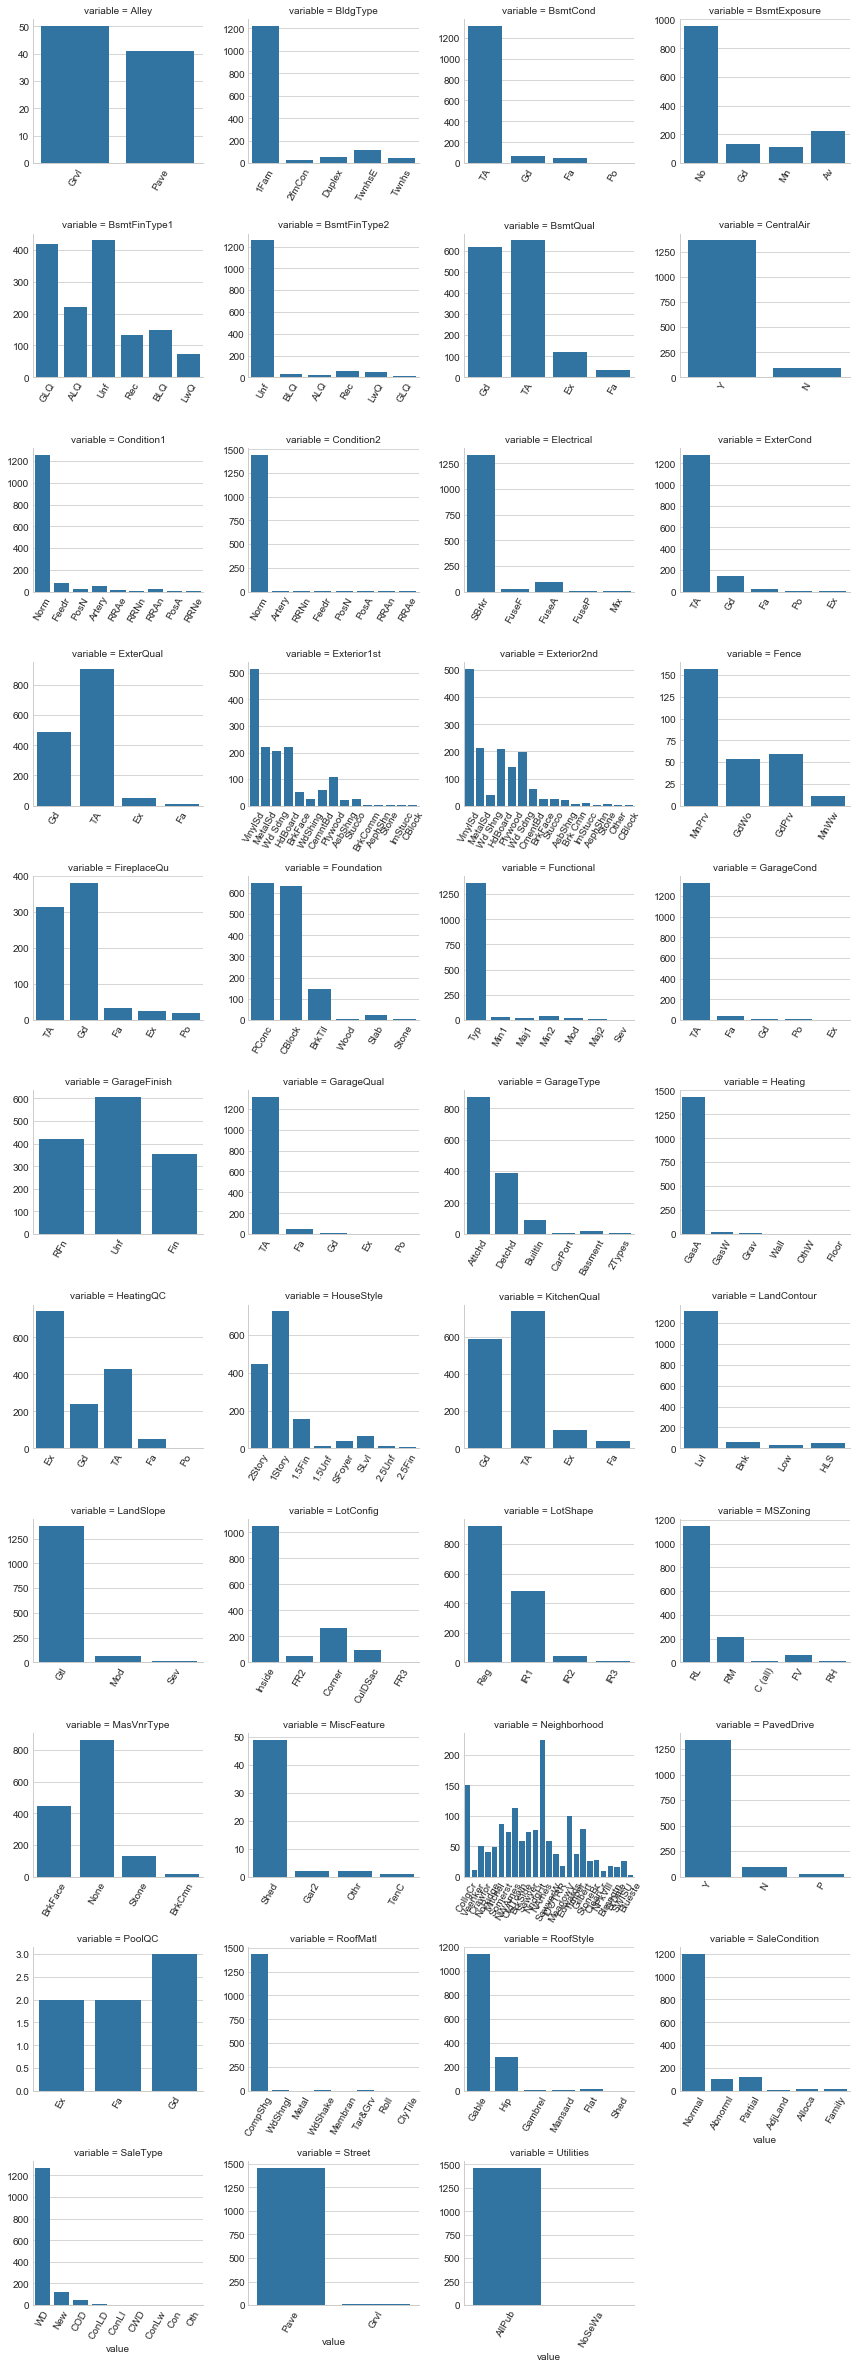

In [15]:
f = pd.melt(train_dataset, value_vars=sorted(categorical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [16]:
from mltools.mlcommon import detect_outliers
Outliers_to_drop = detect_outliers(train_dataset,5,non_count_features)
train_dataset.loc[Outliers_to_drop] # Show the outliers rows


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotBath,TotArea,TotalFloorSF
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,572,3608,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000,2.5,4715,3036
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,392,3112,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000,3.5,4472,2720
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,0,4676,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,4.5,7814,4676
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,0,3279,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,4.5,4929,3279
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,0,5642,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,4.5,11752,5642
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,0,4476,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,4.5,6872,4476
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,0,2784,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000,4.5,4176,2784
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,0,3228,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000,4.0,6428,3228
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,0,2822,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933,3.5,4556,2822


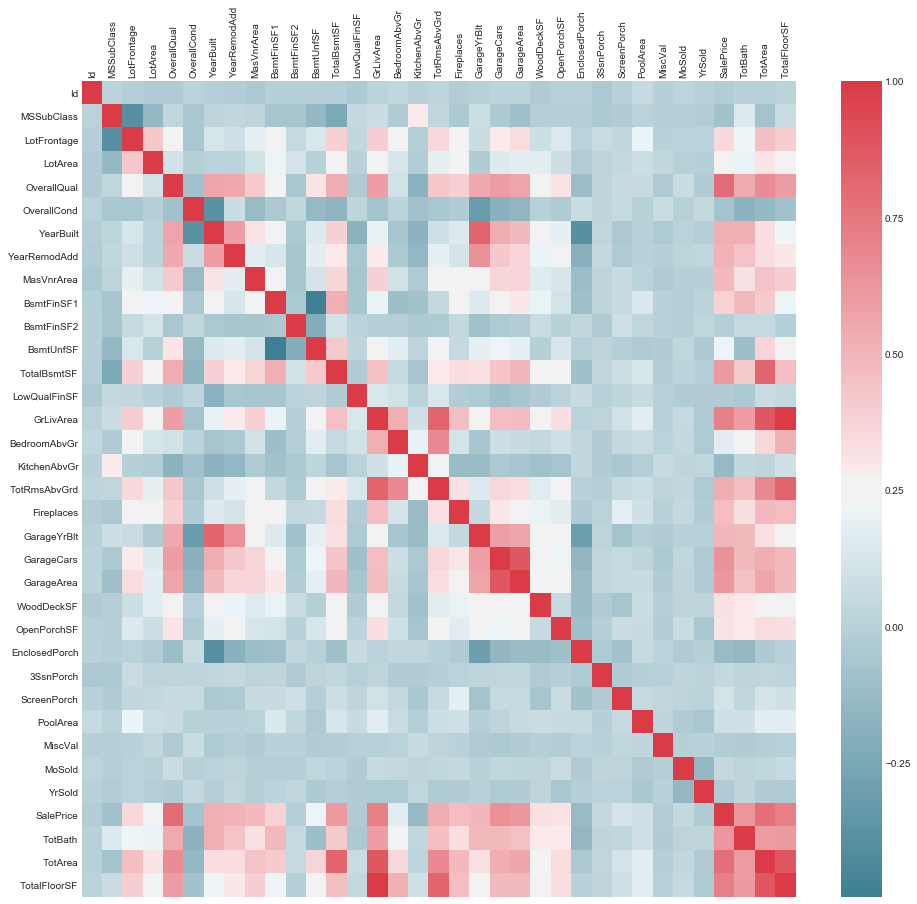

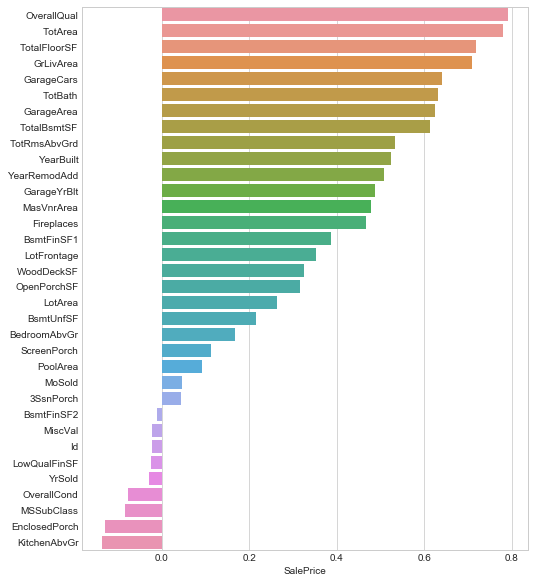

In [17]:
    correlation = train_dataset[continuous_features].corr()
    fig = plt.figure(figsize=(16,15))
    ax = fig.add_subplot(111)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlation, 
               xticklabels=correlation.columns.values,
               yticklabels=correlation.index.values,
               cmap=cmap)
    ax.xaxis.tick_top()
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.show()

    correlation = correlation.sort_values('SalePrice', ascending=False)
    plt.figure(figsize=(8,10))
    sns.barplot( correlation['SalePrice'][1:], correlation.index[1:], orient='h')
    plt.show()

In [18]:
correlation.index[1:]

Index(['OverallQual', 'TotArea', 'TotalFloorSF', 'GrLivArea', 'GarageCars', 'TotBath', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr'], dtype='object')

In [19]:
#log_non_count_features = [feature for feature in non_count_features if feature not in ['GarageArea','GrLivArea']]
log_non_count_features = [feature  for feature in continuous_features
                          if feature not in ['Id','SalePrice','LogSalePrice','YrSold','YearBuilt','YearRemodAdd','MoSold'] ]

In [20]:
train_dataset[log_non_count_features].skew()

MSSubClass        1.4077
LotFrontage       2.1636
LotArea          12.2077
OverallQual       0.2169
OverallCond       0.6931
MasVnrArea        2.6691
BsmtFinSF1        1.6855
BsmtFinSF2        4.2553
BsmtUnfSF         0.9203
TotalBsmtSF       1.5243
LowQualFinSF      9.0113
GrLivArea         1.3666
BedroomAbvGr      0.2118
KitchenAbvGr      4.4884
TotRmsAbvGrd      0.6763
Fireplaces        0.6496
GarageYrBlt      -0.6494
GarageCars       -0.3425
GarageArea        0.1800
WoodDeckSF        1.5414
OpenPorchSF       2.3643
EnclosedPorch     3.0899
3SsnPorch        10.3043
ScreenPorch       4.1222
PoolArea         14.8284
MiscVal          24.4768
TotBath           0.2647
TotArea           1.7780
TotalFloorSF      1.3305
dtype: float64

In [21]:
",".join(non_count_features)

'LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotArea,TotalFloorSF'

In [22]:
log_transformer = LogTransformer(log_non_count_features)
train_dataset_log = log_transformer.fit_transform(train_dataset)
test_dataset_log  = log_transformer.fit_transform(test_dataset)

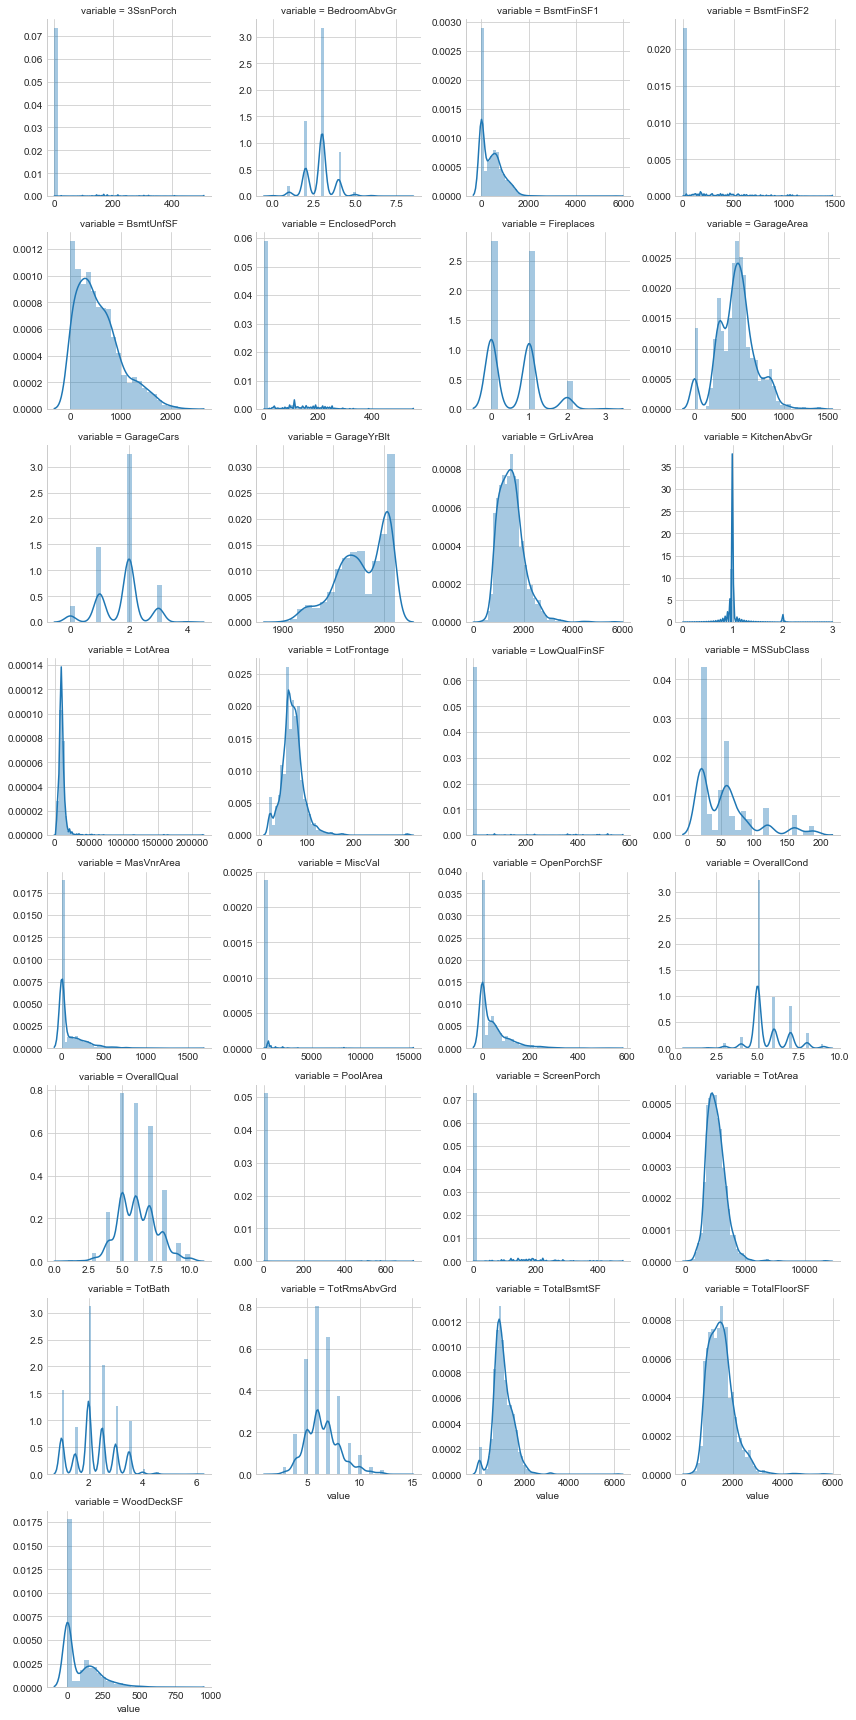

In [23]:
f = pd.melt(train_dataset, value_vars=sorted(log_non_count_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

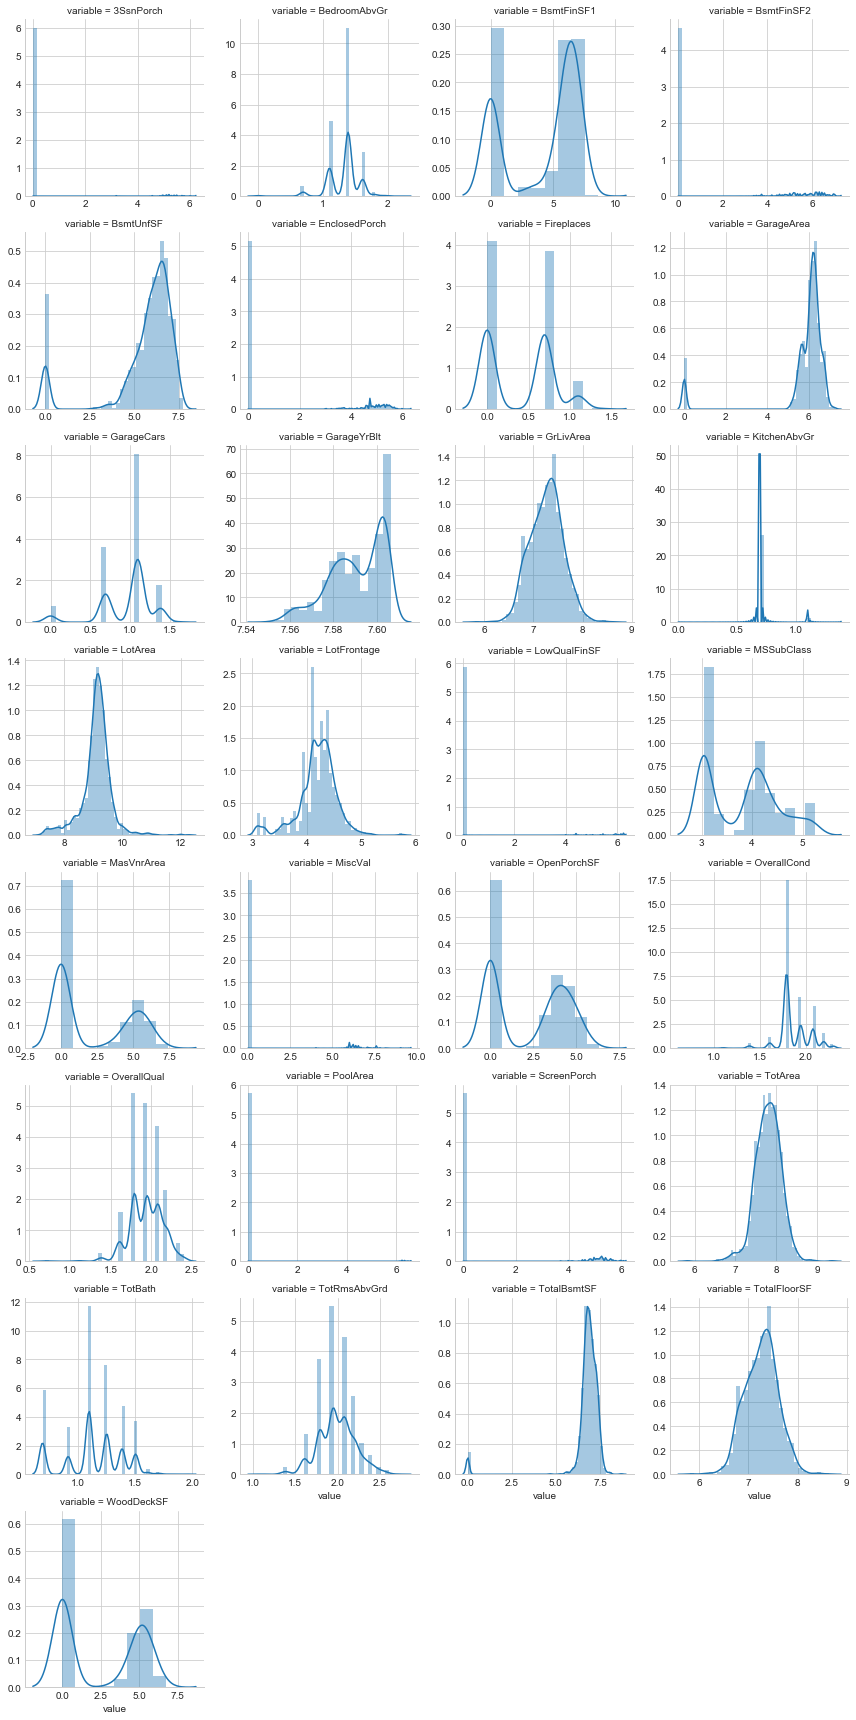

In [24]:
# Grid of distribution plots of all numerical features
f = pd.melt(train_dataset_log, value_vars=sorted(log_non_count_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [25]:
train_dataset_log[log_non_count_features].skew()

MSSubClass        0.2490
LotFrontage      -0.7287
LotArea          -0.1374
OverallQual      -0.5910
OverallCond      -0.2540
MasVnrArea        0.4944
BsmtFinSF1       -0.6184
BsmtFinSF2        2.5237
BsmtUnfSF        -2.1865
TotalBsmtSF      -5.1547
LowQualFinSF      7.4603
GrLivArea        -0.0061
BedroomAbvGr     -1.2337
KitchenAbvGr      3.8694
TotRmsAbvGrd     -0.0583
Fireplaces        0.1821
GarageYrBlt      -0.6714
GarageCars       -1.3702
GarageArea       -3.4826
WoodDeckSF        0.1535
OpenPorchSF      -0.0234
EnclosedPorch     2.1123
3SsnPorch         7.7350
ScreenPorch       3.1504
PoolArea         14.3631
MiscVal           5.1707
TotBath          -0.2985
TotArea          -0.3437
TotalFloorSF     -0.0337
dtype: float64

In [26]:
train_dataset[non_count_features].skew()

LotFrontage       2.1636
LotArea          12.2077
MasVnrArea        2.6691
BsmtFinSF1        1.6855
BsmtFinSF2        4.2553
BsmtUnfSF         0.9203
TotalBsmtSF       1.5243
LowQualFinSF      9.0113
GrLivArea         1.3666
GarageArea        0.1800
WoodDeckSF        1.5414
OpenPorchSF       2.3643
EnclosedPorch     3.0899
3SsnPorch        10.3043
ScreenPorch       4.1222
PoolArea         14.8284
MiscVal          24.4768
TotArea           1.7780
TotalFloorSF      1.3305
dtype: float64

No of  columns: 29


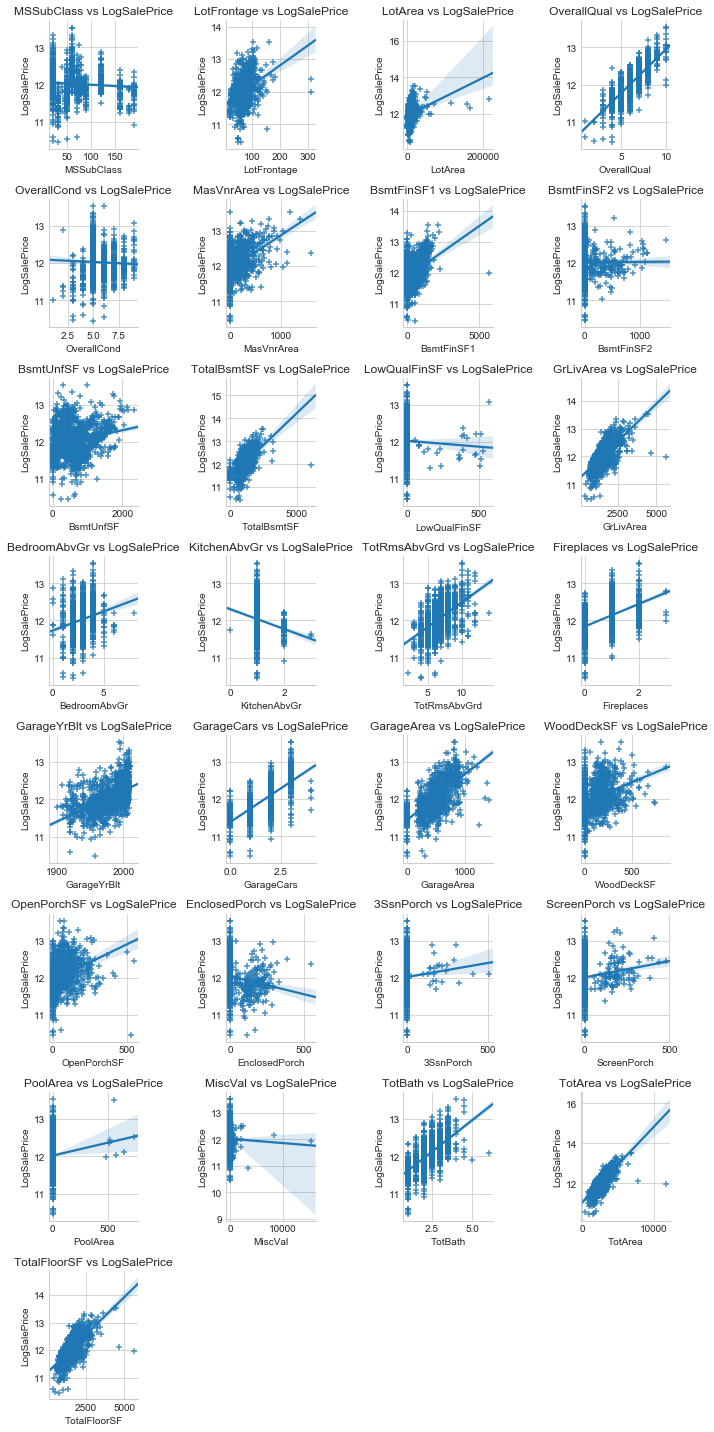

In [27]:

cols  = train_dataset[log_non_count_features].shape[1]
print("No of  columns: {0}".format(cols))
def plot_dataset(dataset,features ,response_column,log=False):
    fig = plt.figure(figsize=(10,20))

   
    for subplot_index ,i in enumerate(range(0,len(features))):
        if(features[i] != response_column ):
            ax = fig.add_subplot(8, 4,  subplot_index + 1)
            if log:
                ax.set(xscale="log",yscale ="log")
            #ax.scatter(X.iloc[:,i],np.log1p(y),marker=".")
            sns.regplot(x=features[i],y= response_column , marker="+", data = dataset,ax=ax)
            sns.despine()
            ax.set_title("{0} vs {1}".format(features[i],response_column))
            plt.tight_layout()
 
    plt.show()
lm_train = train_dataset[log_non_count_features] 
lm_train[LOGRESPONSE]= np.log1p(train_dataset[RESPONSE])    
plot_dataset(lm_train,log_non_count_features,LOGRESPONSE)

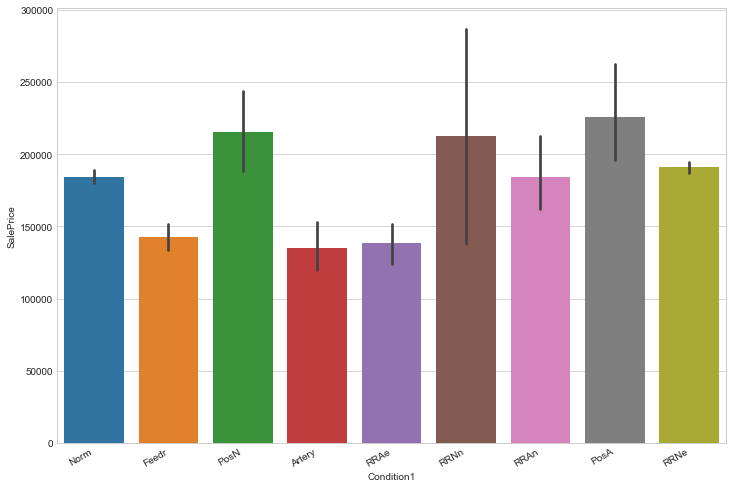

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.barplot(y="SalePrice", x="Condition1", data=train_dataset,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [29]:
neigbourhood_saleprice =train_dataset.groupby('Neighborhood').agg({'SalePrice':'median'}).reset_index()
neigbourhood_saleprice = pd.DataFrame(neigbourhood_saleprice).sort_values(by=['SalePrice'])
neigbourhood_saleprice 
 

,Neighborhood,SalePrice
10,MeadowV,88000
9,IDOTRR,103000
2,BrDale,106000
17,OldTown,119000
7,Edwards,121750
3,BrkSide,124300
19,Sawyer,135000
1,Blueste,137500
18,SWISU,139500
12,NAmes,140000


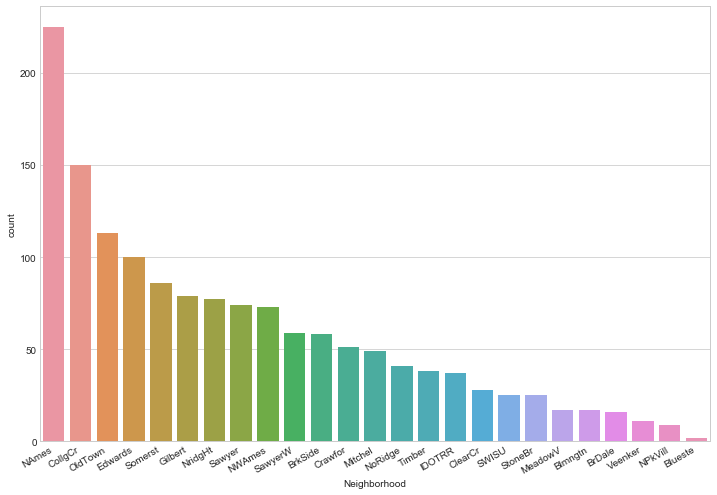

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.countplot(x="Neighborhood", data=train_dataset,ax=ax,order=train_dataset['Neighborhood'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

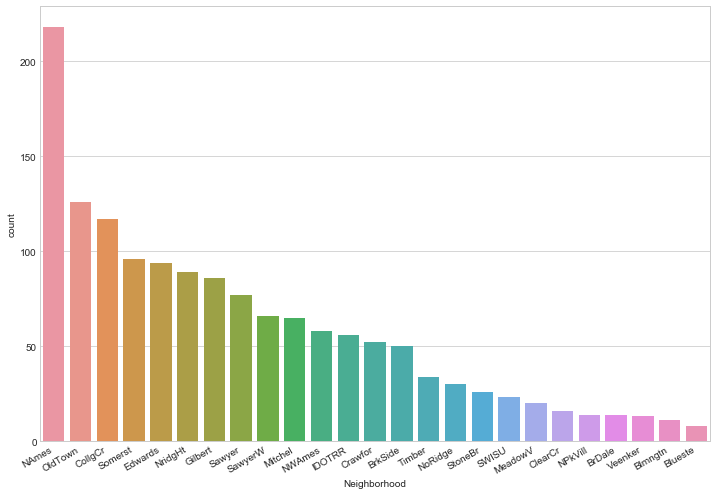

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.countplot(x="Neighborhood", data=test_dataset,ax=ax,order=test_dataset['Neighborhood'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [32]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=90)

In [33]:
cat_data =  train_dataset[train_dataset['SalePrice'].notnull()] [categorical_features+['SalePrice']]

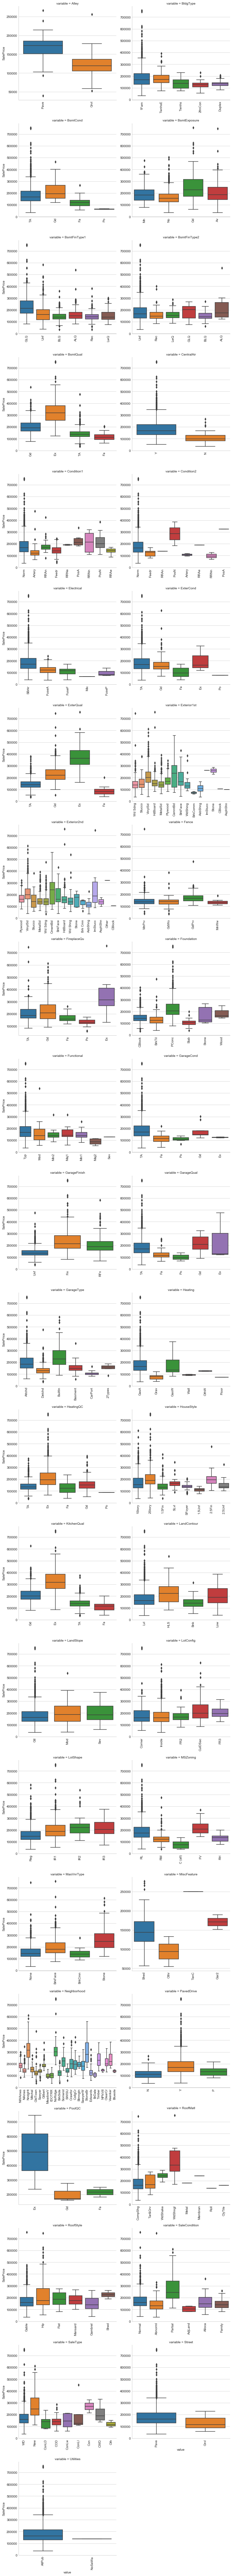

In [34]:
p = pd.melt(cat_data, id_vars='SalePrice', value_vars=categorical_features)
p=p.sort_values(by='variable')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

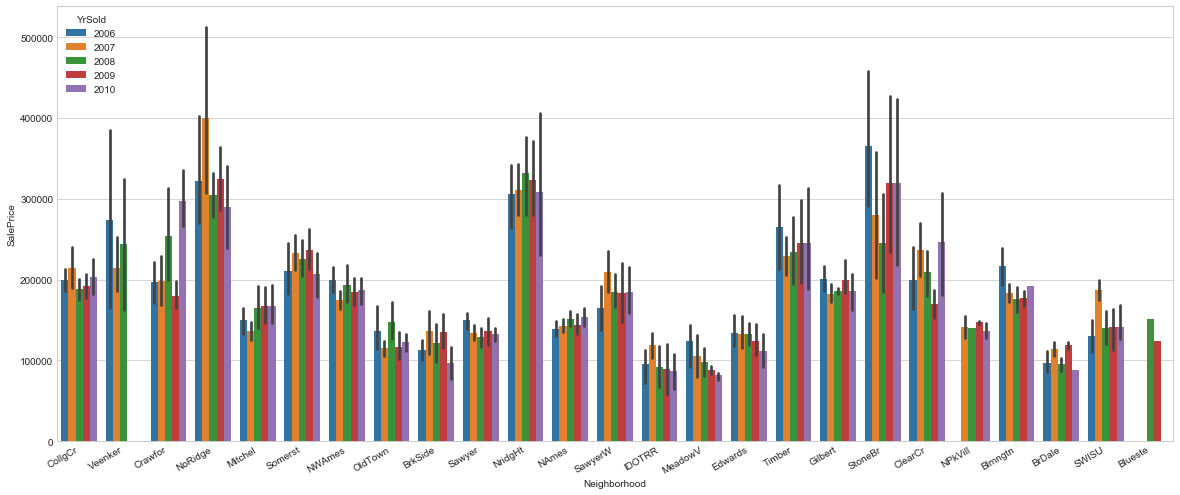

In [35]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="YrSold",  
            data=train_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [36]:
remodelled = train_dataset[train_dataset['YearRemodAdd']==train_dataset['YrSold']]
not_remodelled =train_dataset[train_dataset['YearRemodAdd']!=train_dataset['YrSold']]

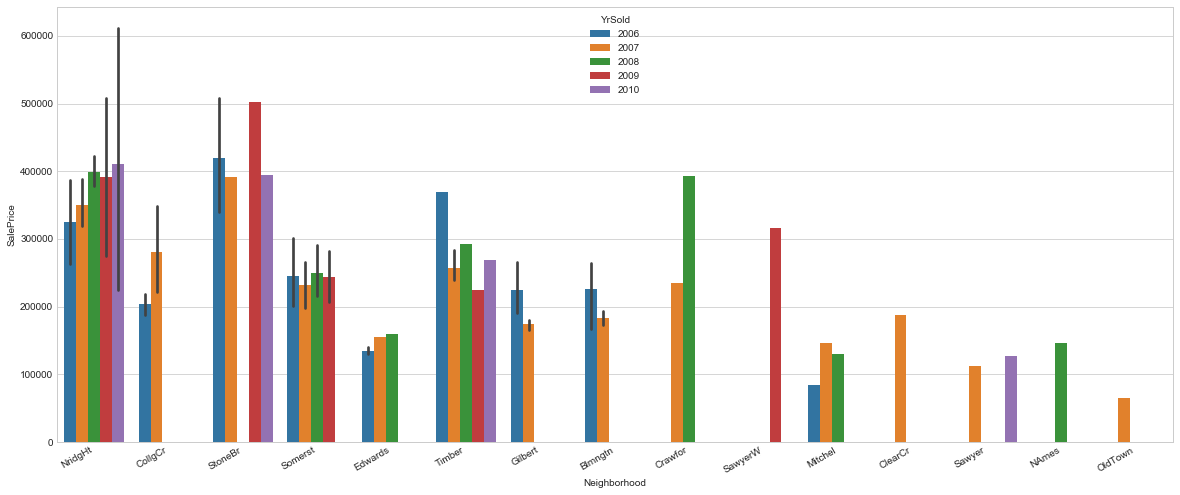

In [37]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="YrSold",  
            data=remodelled)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

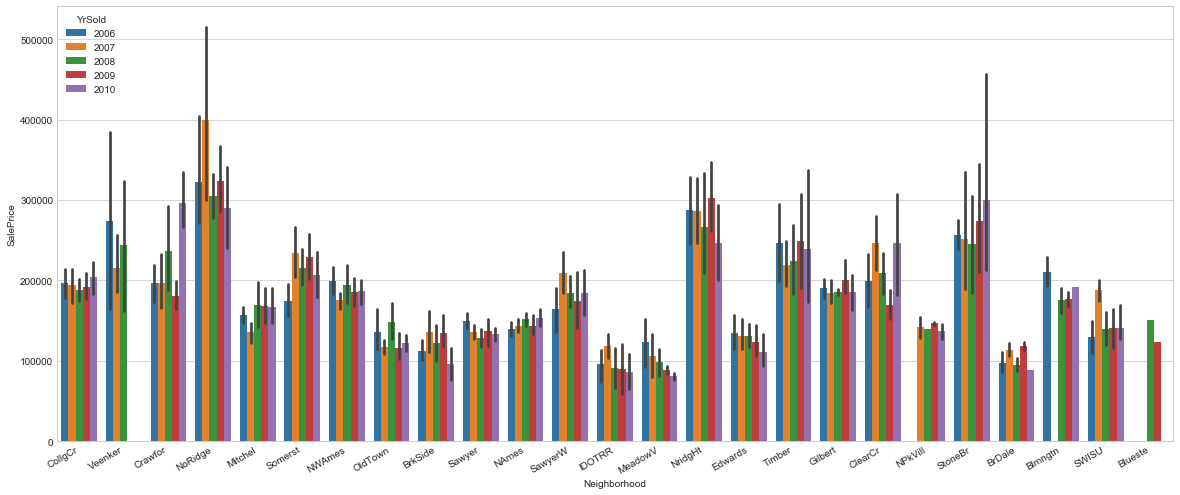

In [38]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="YrSold",  
            data=not_remodelled)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

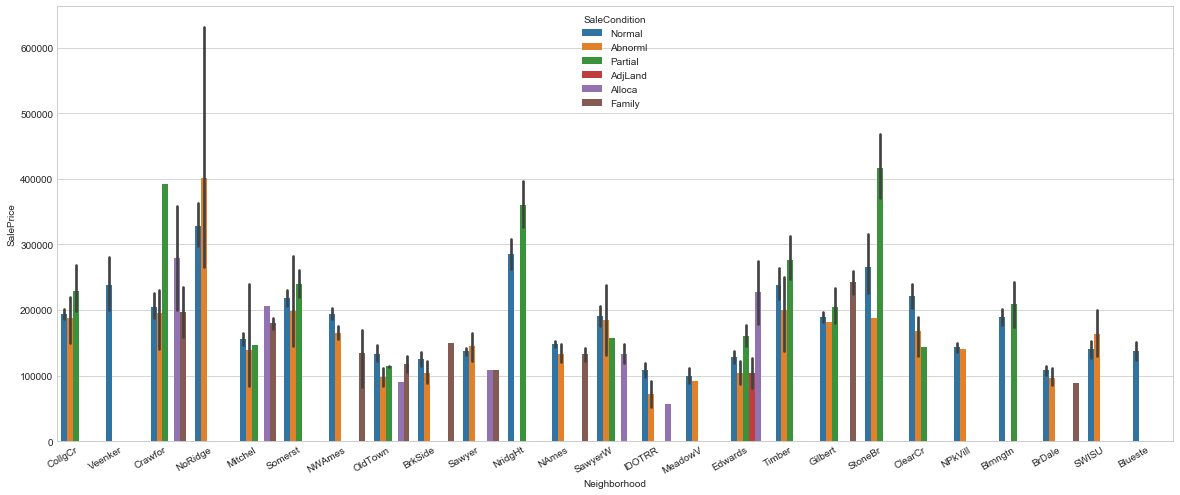

In [39]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="SaleCondition",  
            data=train_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

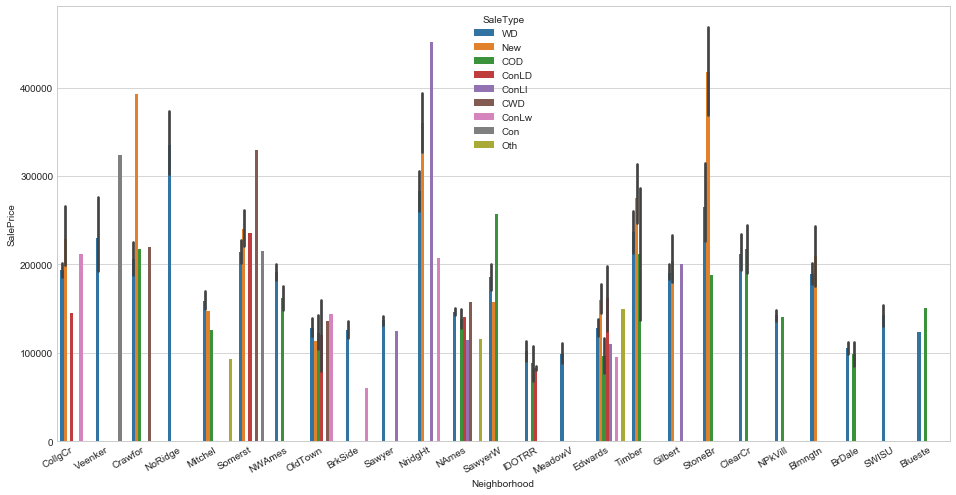

In [40]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="SaleType",  
            data=train_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

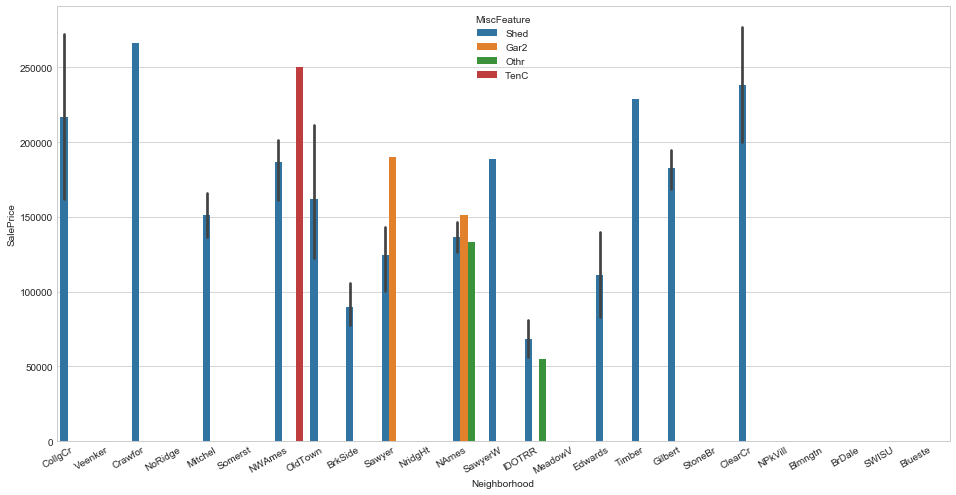

In [41]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="MiscFeature",  
            data=train_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [42]:
train_dataset[(train_dataset['Condition1']!='Normal')&(train_dataset['Condition1']!=train_dataset['Condition2'])
             ].groupby(['Condition1','Condition2'])['SalePrice'].describe().reset_index()

,Condition1,Condition2,count,mean,std,min,25%,50%,75%,max
0,Artery,Norm,45.0,132142.2222,61751.7960,66500.0,105000.0,119900.0,143000.0,475000.0
1,Artery,PosA,1.0,325000.0000,NaN,325000.0,325000.0,325000.0,325000.0,325000.0
2,Feedr,Norm,76.0,143883.0132,41738.4868,40000.0,121900.0,141000.0,167750.0,244600.0
3,Feedr,RRAe,1.0,190000.0000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
4,Feedr,RRAn,1.0,136905.0000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
5,Feedr,RRNn,2.0,96750.0000,39951.5331,68500.0,82625.0,96750.0,110875.0,125000.0
6,PosA,Norm,8.0,225875.0000,52348.9323,180000.0,188750.0,212500.0,244000.0,335000.0
7,PosN,Norm,17.0,206985.2941,53470.2364,109500.0,165000.0,200000.0,242000.0,313000.0
8,RRAe,Norm,11.0,138400.0000,24030.8136,87000.0,127750.0,142500.0,156500.0,171000.0
9,RRAn,Feedr,4.0,128500.0000,36771.8189,79500.0,115125.0,133500.0,146875.0,167500.0


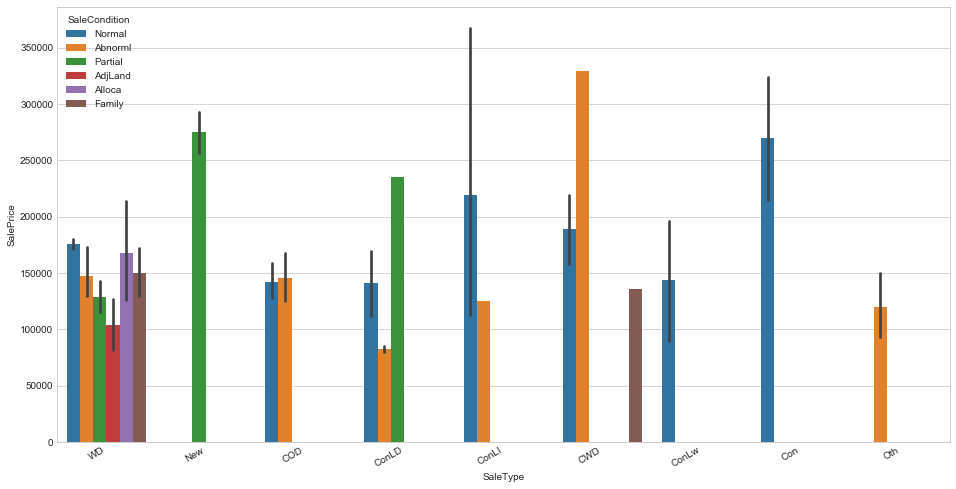

In [43]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sns.barplot(x="SaleType", y="SalePrice", hue="SaleCondition",  
            data=train_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [44]:
within_Family =  train_dataset[train_dataset['SaleCondition']=='Family'].groupby('Neighborhood').agg({'SalePrice':['median','count']}).reset_index()
within_Family

Neighborhood SalePrice      
                  median count
0       BrDale     88000     1
1      BrkSide    149000     1
2      Crawfor    196750     2
3      Gilbert    242000     2
4      Mitchel    179500     2
5        NAmes    135000     4
6       NWAmes    152000     3
7      OldTown    116000     4
8       Sawyer    108000     1

In [45]:
not_within_Family =  train_dataset[train_dataset['SaleCondition']!='Normal'].groupby(['Neighborhood','SaleCondition']).agg({'SalePrice':['median','count'],}).reset_index()
not_within_Family.sort_values(by=['SaleCondition'],ascending =False)

Neighborhood SaleCondition SalePrice      
                                 median count
0       Blmngtn       Partial  194201.0     5
12      Crawfor       Partial  392500.0     1
48      StoneBr       Partial  393216.0     8
46      Somerst       Partial  229456.0    33
44      SawyerW       Partial  158000.0     1
37      OldTown       Partial  114000.0     2
33      NridgHt       Partial  356147.0    32
26      Mitchel       Partial  147000.0     1
19      Gilbert       Partial  179602.5    12
16      Edwards       Partial  157500.0     4
50       Timber       Partial  269500.0     7
8       CollgCr       Partial  203950.0    18
6       ClearCr       Partial  143000.0     1
11      Crawfor        Family  196750.0     2
2        BrDale        Family   88000.0     1
4       BrkSide        Family  149000.0     1
41       Sawyer        Family  108000.0     1
36      OldTown        Family  116000.0     4
28        NAmes        Family  135000.0     4
31       NWAmes        Family  152000.0     3
25      Mitchel        Family  179500.0     2
18      Gilbert        Family  242000.0     2
43      SawyerW        Alloca  130958.5     4
15      Edwards        Alloca  226985.0     2
40       Sawyer        Alloca  108959.0     1
21       IDOTRR        Alloca   55993.0     1
10      Crawfor        Alloca  279862.0     2
35      OldTown        Alloca   89471.0     1
24      Mitchel        Alloca  206300.0     1
14      Edwards       AdjLand  104000.0     4
27        NAmes       Abnorml  129000.0    23
49       Timber       Abnorml  175000.0     3
13      Edwards       Abnorml  108500.0     8
47      StoneBr       Abnorml  187500.0     1
3       BrkSide       Abnorml  100000.0     3
45      Somerst       Abnorml  159250.0     4
22      MeadowV       Abnorml   92000.0     1
42      SawyerW       Abnorml  181250.0     4
23      Mitchel       Abnorml   93500.0     3
39       Sawyer       Abnorml  158900.0     5
29      NPkVill       Abnorml  140000.0     1
38        SWISU       Abnorml  159434.0     3
5       ClearCr       Abnorml  185000.0     3
9       Crawfor       Abnorml  217000.0     3
1        BrDale       Abnorml   91500.0     3
34      OldTown       Abnorml  101000.0    12
17      Gilbert       Abnorml  181000.0     1
32      NoRidge       Abnorml  300000.0     4
7       CollgCr       Abnorml  193000.0     3
30       NWAmes       Abnorml  166500.0     6
20       IDOTRR       Abnorml   68400.0     7

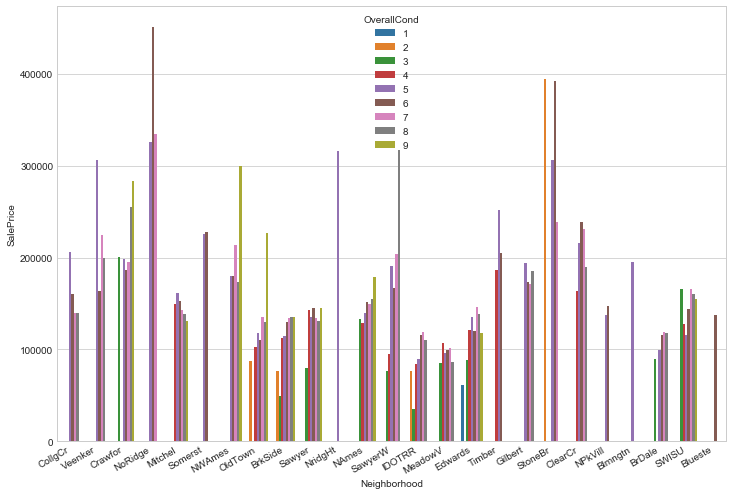

In [49]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
sns.barplot(x="Neighborhood", y="SalePrice", hue="OverallCond",  
            data=train_dataset,ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.show()

In [55]:
condition_neighborhood = train_dataset.groupby(['Neighborhood','OverallCond']).agg({'SalePrice':['median','count']}).reset_index()
condition_neighborhood.sort_values(by=['Neighborhood'])

Neighborhood OverallCond SalePrice      
                                median count
0        Blmngtn           5  191000.0    17
1        Blueste           6  137500.0     2
2         BrDale           3   89500.0     1
3         BrDale           5   97250.0    10
4         BrDale           6  115500.0     2
5         BrDale           7  118750.0     2
6         BrDale           8  118000.0     1
14       BrkSide           9  134900.0     1
13       BrkSide           8  130000.0     6
11       BrkSide           6  127500.0    19
12       BrkSide           7  121600.0    17
9        BrkSide           4  112500.0     2
8        BrkSide           3   49650.0     2
7        BrkSide           2   76500.0     1
10       BrkSide           5  114500.0    10
15       ClearCr           4  134432.0     3
16       ClearCr           5  191000.0    14
17       ClearCr           6  256000.0     3
18       ClearCr           7  241500.0     5
19       ClearCr           8  187500.0     3
20       CollgCr           5  203500.0   128
21       CollgCr           6  133500.0    11
22       CollgCr           7  138250.0     8
23       CollgCr           8  136500.0     3
29       Crawfor           9  266500.0     5
27       Crawfor           7  188700.0    15
28       Crawfor           8  259500.0     7
25       Crawfor           5  164000.0    11
26       Crawfor           6  165950.0    12
24       Crawfor           3  200624.0     1
..           ...         ...       ...   ...
88         SWISU           5  116750.0     8
87         SWISU           4  128000.0     1
86         SWISU           3  166000.0     2
89         SWISU           6  135900.0     5
93        Sawyer           3   80000.0     1
94        Sawyer           4  150000.0     5
95        Sawyer           5  133500.0    32
96        Sawyer           6  139000.0    15
97        Sawyer           7  131250.0    12
98        Sawyer           8  134500.0     8
99        Sawyer           9  145000.0     1
105      SawyerW           8  316600.0     1
103      SawyerW           6  159000.0     4
104      SawyerW           7  194500.0     3
101      SawyerW           4   94500.0     2
100      SawyerW           3   76000.0     1
102      SawyerW           5  182450.0    48
106      Somerst           5  225000.0    83
107      Somerst           6  227875.0     3
108      StoneBr           2  394432.0     1
109      StoneBr           5  276500.0    22
110      StoneBr           6  392000.0     1
111      StoneBr           7  239000.0     1
112       Timber           4  186700.0     1
113       Timber           5  248900.0    31
114       Timber           6  202000.0     6
117      Veenker           7  194000.0     3
115      Veenker           5  297000.0     4
116      Veenker           6  163750.0     2
118      Veenker           8  199750.0     2

[119 rows x 4 columns]